In [1]:
print('hello world')

hello world


# Bibliotecas

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datasets

In [8]:
df_pacientes = pd.read_csv('../datasets/dados_pacientes_trat.csv', sep=';')
df_clinico = pd.read_csv('../datasets/dados_clinicos_trat.csv', sep=';')
df_estados = pd.read_csv('../datasets/estado_regiao_trat.csv', sep=';')

In [7]:
df_pacientes.sample(5)

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario
696,697,46,Funcionário Setor Privado,Doutorado,17,Divorciado,Branco,0,9990
6032,6033,26,Autônomo,Ensino Médio Completo,10,Solteiro,Branco,4,2429
2736,2737,34,Funcionário Setor Privado,Ensino Médio Incompleto,7,Casado,Negro,5,1100
1882,1883,68,Aposentado,Ensino Médio Incompleto,2,Casado,Branco,3,2287
6450,6451,26,Funcionário Setor Privado,Ensino Médio Incompleto,6,Solteiro,Negro,2,1100


In [9]:
df_clinico.sample(5)

,id_cliente,peso,colesterol,genero
2578,2579,133.7,173.6,Masculino
1636,1637,196.7,231.4,Masculino
6874,6875,123.7,186.0,Masculino
874,875,99.9,163.1,Feminino
8793,8794,69.6,143.4,Masculino


In [10]:
df_estados.sample(5)

,id_estado,sigla,estado,regiao,pais
2,3,AP,Amapá,Norte,Brasil
17,18,PI,Piauí,Nordeste,Brasil
15,16,PR,Paraná,Sul,Brasil
21,22,RO,Rondônia,Norte,Brasil
4,5,BA,Bahia,Nordeste,Brasil


Crie um histograma das idades de todas as pessoas que residem no estado de são paulo e trabalham no setor privado. Utilize 20 barras para representar graficamente os dados. Em seguida, selecione a opção que melhor se adapta à visualização.

In [18]:
df_temp = df_pacientes.merge(df_estados, on='id_estado')

In [23]:
consulta = df_temp.query('classe_trabalho == "Funcionário Setor Privado" and estado == "São Paulo"')

<Axes: xlabel='idade', ylabel='Count'>

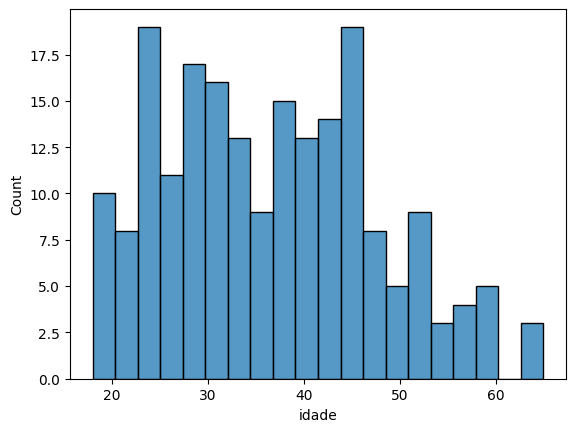

In [28]:
sns.histplot(data=consulta, x='idade', bins=20)

Crie um gráfico de barras que represente a média salarial de todas as pessoas, agrupadas por raça. Em seguida, selecione a melhor representação gráfica.

In [30]:
df_temp.sample(3)

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,sigla,estado,regiao,pais
1457,1458,70,Aposentado,Ensino Médio Incompleto,7,Casado,Negro,2,3717,DF,Distrito Federal,Centro-Oeste,Brasil
7288,7289,21,Autônomo,Ensino Médio Completo,27,Solteiro,Branco,4,3866,TO,Tocantins,Norte,Brasil
7900,7901,38,Autônomo,Ensino Médio Completo,21,Casado,Branco,1,3390,RS,Rio Grande do Sul,Sul,Brasil


In [32]:
salario_raca = df_temp.groupby('raca')['salario'].mean()

<Axes: xlabel='raca', ylabel='salario'>

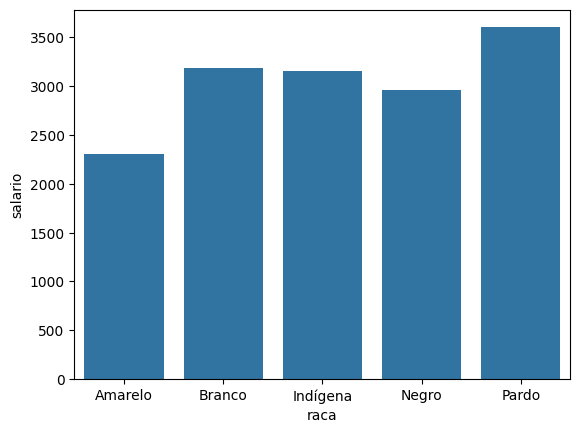

In [33]:
sns.barplot(data=salario_raca)

Crie um gráfico de barras para visualizar a distribuição do número de pessoas residentes em Minas Gerais, agrupadas por estado civil e raça. Em seguida, selecione a melhor representação gráfica

In [34]:
minas = df_temp.query('estado == "Minas Gerais"')

In [45]:
minas.sample(3)

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,sigla,estado,regiao,pais
649,650,34,Funcionário Setor Privado,Ensino Médio Incompleto,13,Casado,Branco,1,1100,MG,Minas Gerais,Sudeste,Brasil
1678,1679,43,Funcionário Setor Privado,Ensino Médio Incompleto,13,Solteiro,Negro,4,1100,MG,Minas Gerais,Sudeste,Brasil
3631,3632,63,Autônomo,Ensino Médio Completo,13,Solteiro,Branco,5,2807,MG,Minas Gerais,Sudeste,Brasil


In [76]:
agrupamento_minas = minas.groupby('raca')['estado_civil'].value_counts().reset_index()
agrupamento_minas.sort_values('estado_civil', ascending=True, inplace=True)

In [77]:
agrupamento_minas

,raca,estado_civil,count
0,Branco,Casado,124
7,Indígena,Casado,1
10,Negro,Casado,8
14,Pardo,Casado,3
2,Branco,Divorciado,37
8,Indígena,Divorciado,1
11,Negro,Divorciado,6
3,Branco,Separado,9
12,Negro,Separado,4
1,Branco,Solteiro,89


<Axes: xlabel='raca', ylabel='count'>

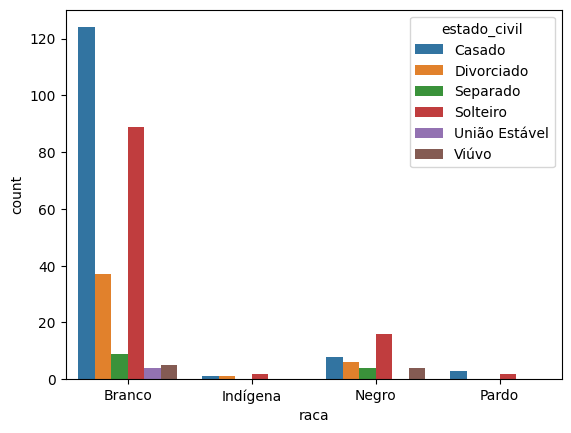

In [78]:
sns.barplot(data=agrupamento_minas, x='raca', y='count', hue='estado_civil')

Qual é a média e o desvio padrão do colesterol das pessoas que têm peso superior a 120 kg e residem na região Sul do Brasil?

In [82]:
df_completo = df_temp.merge(df_clinico, on='id_cliente')

In [86]:
media_dp_sul = df_completo.query('regiao == "Sul" and peso >= 120')

In [89]:
media_dp_sul.sample(3)

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,sigla,estado,regiao,pais,peso,colesterol,genero
4689,4690,23,Funcionário Setor Privado,Ensino Fundamental Completo,16,União Estável,Branco,3,1100,PR,Paraná,Sul,Brasil,140.3,173.2,Feminino
2266,2267,48,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Branco,1,1100,SC,Santa Catarina,Sul,Brasil,134.2,203.0,Feminino
4587,4588,39,Autônomo,Ensino Médio Completo,24,Solteiro,Pardo,2,3544,SC,Santa Catarina,Sul,Brasil,181.8,233.1,Feminino


In [91]:
media_dp_sul.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id_cliente,455.0,3852.052747,2253.570668,2.0,1915.5,3887.0,5852.50,7971.0
idade,455.0,38.050549,13.829821,17.0,27.0,36.0,48.00,77.0
id_estado,455.0,20.443956,3.298752,16.0,16.0,21.0,24.00,24.0
qtde_filhos,455.0,2.527473,1.731673,0.0,1.0,3.0,4.00,5.0
salario,455.0,2981.342857,2704.653987,2.0,1100.0,2365.0,3574.50,18899.0
peso,455.0,158.383297,23.560719,120.1,137.3,157.7,179.35,199.5
colesterol,455.0,206.955385,21.890615,159.6,189.7,206.3,225.20,264.4


Crie um gráfico de dispersão com as variáveis peso no eixo x e colesterol no eixo y para as pessoas na região Sudeste agrupados por gênero. Em seguida, escolha o gráfico que melhor representa essa ilustração.

In [93]:
colesterol_sudeste = df_completo.query('regiao == "Sudeste"')

In [94]:
colesterol_sudeste.sample(5)

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,sigla,estado,regiao,pais,peso,colesterol,genero
2105,2106,57,Funcionário Setor Privado,Ensino Médio Incompleto,19,Solteiro,Branco,0,1100,RJ,Rio de Janeiro,Sudeste,Brasil,72.0,156.9,Masculino
6165,6166,20,Funcionário Setor Privado,Ensino Médio Completo,25,Solteiro,Branco,0,3824,SP,São Paulo,Sudeste,Brasil,128.6,173.9,Feminino
3920,3921,46,Funcionário Setor Privado,Ensino Médio Incompleto,25,Casado,Branco,2,1100,SP,São Paulo,Sudeste,Brasil,185.5,227.8,Masculino
395,396,20,Funcionário Setor Privado,Ensino Médio Incompleto,13,Solteiro,Branco,1,1100,MG,Minas Gerais,Sudeste,Brasil,73.3,130.6,Feminino
4676,4677,34,Funcionário Setor Privado,Ensino Médio Completo,19,Casado,Branco,5,2429,RJ,Rio de Janeiro,Sudeste,Brasil,195.0,220.0,Feminino


<Axes: xlabel='peso', ylabel='colesterol'>

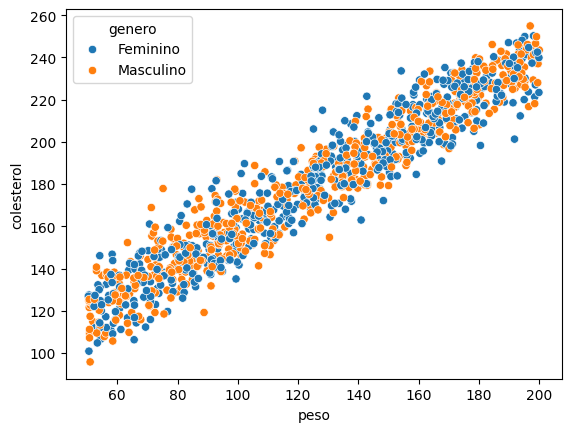

In [99]:
sns.scatterplot(data=colesterol_sudeste, x='peso', y='colesterol', hue='genero')

Qual é a classe de trabalho com o maior número de pessoas e qual é o número correspondente na base de dados?



In [101]:
df_pacientes['classe_trabalho'].value_counts()

classe_trabalho
Funcionário Setor Privado    5769
Autônomo                      588
Empresário                    496
Servidor Público              299
MEI                           275
Aposentado                    267
Funcionário Público           216
Menor Aprendiz                 85
Desempregado                    3
Estagiário                      1
Name: count, dtype: int64

Qual é a classe de trabalho que apresenta a maior média de salários e qual é o valor associado para as pessoas do estado de Pernambuco?

In [138]:
salario_pernambuco = df_completo.query('estado == "Pernambuco"')

In [139]:
salario_pernambuco.groupby('classe_trabalho')['salario'].mean()

classe_trabalho
Aposentado                    4139.300000
Autônomo                      2444.689655
Empresário                   11871.600000
Funcionário Público           6365.625000
Funcionário Setor Privado     2347.574661
MEI                           4098.125000
Menor Aprendiz                1100.000000
Servidor Público              6381.500000
Name: salario, dtype: float64

Crie um gráfico de boxplot para os salários agrupados por classe de trabalho. Em seguida, escolha a representação que melhor se adapta.

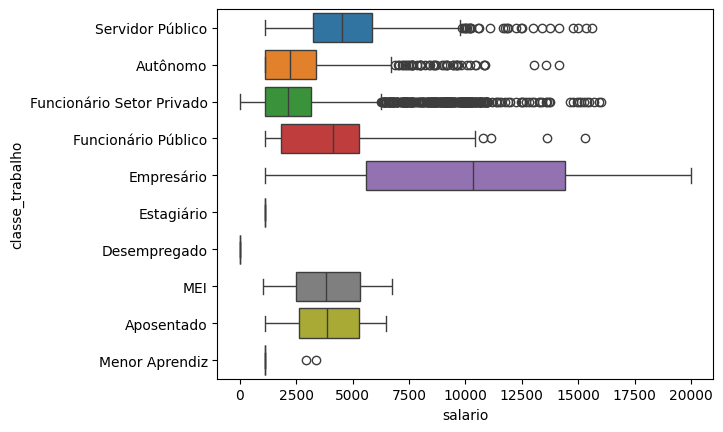

In [115]:
g = sns.boxplot(data=df_completo, x='salario', y='classe_trabalho', hue='classe_trabalho')
plt.show(g)

Crie um gráfico de boxplot para as idades agrupados por raça para todas as pessoas que são da região sudeste. Em seguida, escolha a representação que melhor se adapta.

<Axes: xlabel='idade', ylabel='raca'>

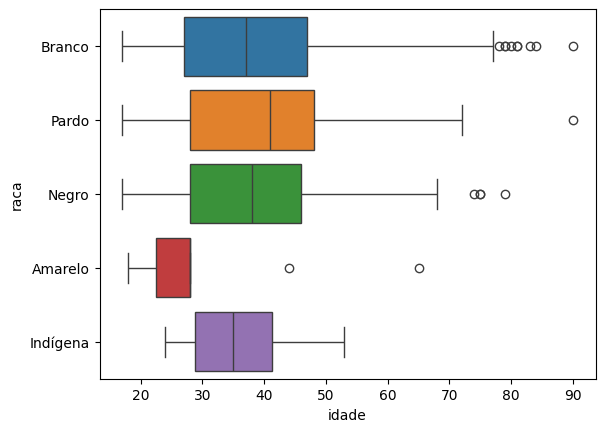

In [116]:
sns.boxplot(data=colesterol_sudeste, x='idade', y='raca', hue='raca')

Qual é a média salarial das pessoas casadas que possuem ensino superior completo e trabalham como Funcionário de Setor Privado?



In [123]:
df_completo['classe_trabalho'].value_counts()

classe_trabalho
Funcionário Setor Privado    5769
Autônomo                      588
Empresário                    496
Servidor Público              299
MEI                           275
Aposentado                    267
Funcionário Público           216
Menor Aprendiz                 85
Desempregado                    3
Estagiário                      1
Name: count, dtype: int64

In [125]:
media_salario = df_completo.query('estado_civil == "Casado" and\
                                  escolaridade == "Superior Completo" and \
                                  classe_trabalho == "Funcionário Setor Privado"')

In [127]:
media_salario['salario'].mean()

np.float64(11025.0)

In [133]:
df_completo.query('escolaridade == "Superior Completo"')

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,sigla,estado,regiao,pais,peso,colesterol,genero
10,11,37,Funcionário Setor Privado,Superior Completo,4,Casado,Negro,4,10316,AM,Amazonas,Norte,Brasil,62.0,124.2,Masculino
44,45,25,Funcionário Setor Privado,Superior Completo,23,Solteiro,Branco,2,8359,RR,Roraima,Norte,Brasil,161.4,204.3,Feminino
82,83,59,Funcionário Setor Privado,Superior Completo,16,Casado,Branco,5,11734,PR,Paraná,Sul,Brasil,84.1,129.1,Feminino
106,107,30,Funcionário Setor Privado,Superior Completo,26,Solteiro,Branco,0,7640,SE,Sergipe,Nordeste,Brasil,126.4,168.9,Feminino
191,192,41,Empresário,Superior Completo,4,Casado,Negro,1,2626,AM,Amazonas,Norte,Brasil,148.3,195.4,Feminino
291,292,29,Empresário,Superior Completo,4,Solteiro,Branco,0,17682,AM,Amazonas,Norte,Brasil,116.2,175.9,Masculino


Qual estado civil possui a menor quantidade filhos e qual é esse número? Some a quantidade de filhos

In [136]:
df_completo.groupby('estado_civil')['qtde_filhos'].sum()

estado_civil
Casado           9192
Divorciado       2796
Separado          669
Solteiro         5713
União Estável     284
Viúvo             583
Name: qtde_filhos, dtype: int64